# End-to-end Multi-class Dog Breed Classification Using Deep Learning

This notebook builds an end-to-end multi-class image classifier using TenserFlow and TensorFlow Hub.

## 1. Problem

> Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning / transfer learning.

* There are 120 breeds of dogs (this means there 120 different classes).

* There are around 10,000+ images in the training set (these images have labels).

* There are aroung 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [1]:
# Unzip the uploaded data into Google Drive.
#!unzip "PATH"

# Get our Workspace Ready

* Import TensorFlow
* Import TensorFlow Hub
* Make sure we're using a GPU

In [2]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:" , tf.__version__  )
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "Not Available!")

TF version: 2.17.0
TF Hub version: 0.16.1
GPU Available


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our data into Tensors which is simply a numerical representation.

Let's start by accessing our data and checking out the labels.

In [3]:
import pandas as pd
labelsCsv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labelsCsv.describe())
labelsCsv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

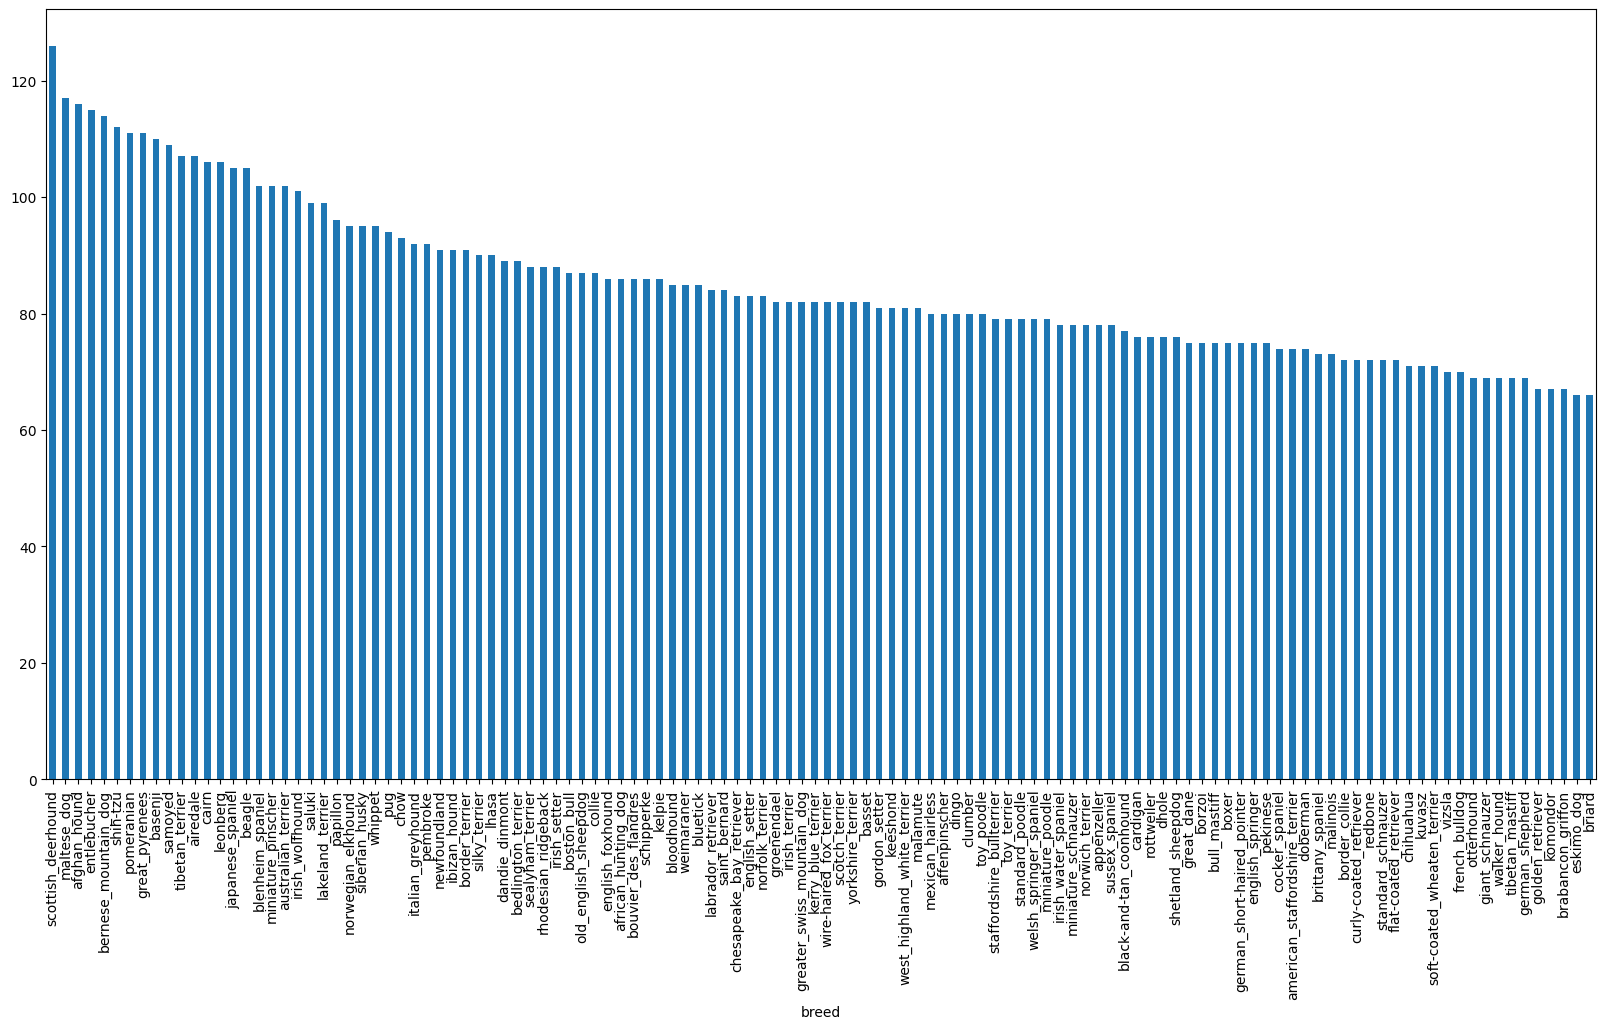

In [4]:
# How many images are there for each breed?
labelsCsv["breed"].value_counts().plot.bar(figsize=(20,10))

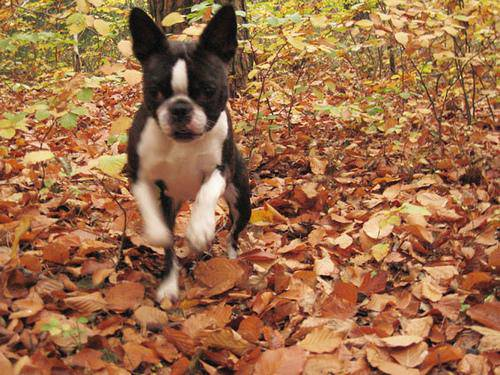

In [5]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathanames.

In [6]:
labelsCsv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# Create pathnames from image ID's
fileNames = ['drive/MyDrive/Dog Vision/train/'+fname+'.jpg' for fname in labelsCsv["id"]]

# Check the first 10
fileNames

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog Vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [8]:
 # Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(fileNames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("FileNames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files! Proceed.


Since we've got our training image filepaths in a list, let's prepare our labels.

In [9]:
import numpy as np
labels = labelsCsv["breed"]
labels = np.array(labels)
len(labels)

10222

In [10]:
# See if number of labels matches the number of filenames
if len(labels) == len(fileNames):
  print("Labels match actual amount of files! Proceed.")
else:
  print("Labels do not match actual amount of files, check the target directory.")

Labels match actual amount of files! Proceed.


In [11]:
uniqueBreeds = np.unique(labels)
uniqueBreeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [12]:
booleanLabels = [ label == uniqueBreeds for label in labels ]
booleanLabels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation dataset

Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [13]:
# Setup X & y variables
X = fileNames
y = booleanLabels

We're going to start off experimenting with ~ 1000 images and increase as needed.

In [14]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [15]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split
# Split them into training and validation of total size NUM_IMAGES
xTrain, xVal, yTrain, yVal = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)


### Preprocessing Images (turning images into tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image. Convert color channels from 0-255 to 0-1 values.
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.


In [16]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(fileNames[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
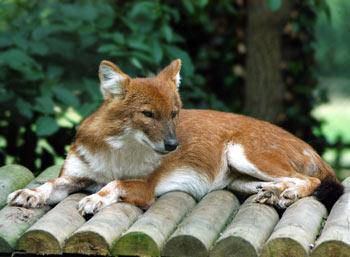

In [17]:
image

In [18]:
# Turn an image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

Let's build the function

In [19]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def processImage(imagePath, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image and return a Tensor string representation of it
  image = tf.io.read_file(imagePath)

  # Turn the jpeg image into numerical Tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... They all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if needed).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image in Tensor form, label)`.

In [20]:
# Create a simple function to return a tuple (image, label)
def getImageLabel(imagePath, label):
  """
  Takes an image file path name and the associated label, processes the image and returns
  a tuple of (image, label).
  """
  # Transforming the image into Tensor.
  image = processImage(imagePath)
  # Return the tuple
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (X & y) into batches!

In [21]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def createDataBatches(X, y=None, batchSize=BATCH_SIZE, validData=False, testData=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (Test data has no labels).
  """
  # If the data is a test dataset, we probably don't have labels.
  if testData:
    print("Creating Test Data Batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths with no labels.
    dataBatch = data.map(processImage).batch(batchSize)
    return dataBatch

  # If the data is a valid dataset, we don't need to shuffle it.
  elif validData:
    print("Creating Validation Data Batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # filepaths and labels
    dataBatch = data.map(getImageLabel).batch(batchSize)
    return dataBatch

  # Training data should be shuffled
  else:
    print("Creating Training Data Batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    data = data.map(getImageLabel)
    dataBatch = data.batch(batchSize)
    return dataBatch

In [22]:
# Create training and validation data batches
trainData = createDataBatches(xTrain, yTrain)
valData = createDataBatches(xVal, yVal, validData=True)

Creating Training Data Batches...
Creating Validation Data Batches...


In [23]:
# Check out the different attributes of our data batches
trainData.element_spec, valData.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand, let's visualize them.

In [24]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch.
def show25Images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(uniqueBreeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [25]:
trainImages, trainLabels = next(trainData.as_numpy_iterator())
len(trainImages), len(trainLabels)

(32, 32)

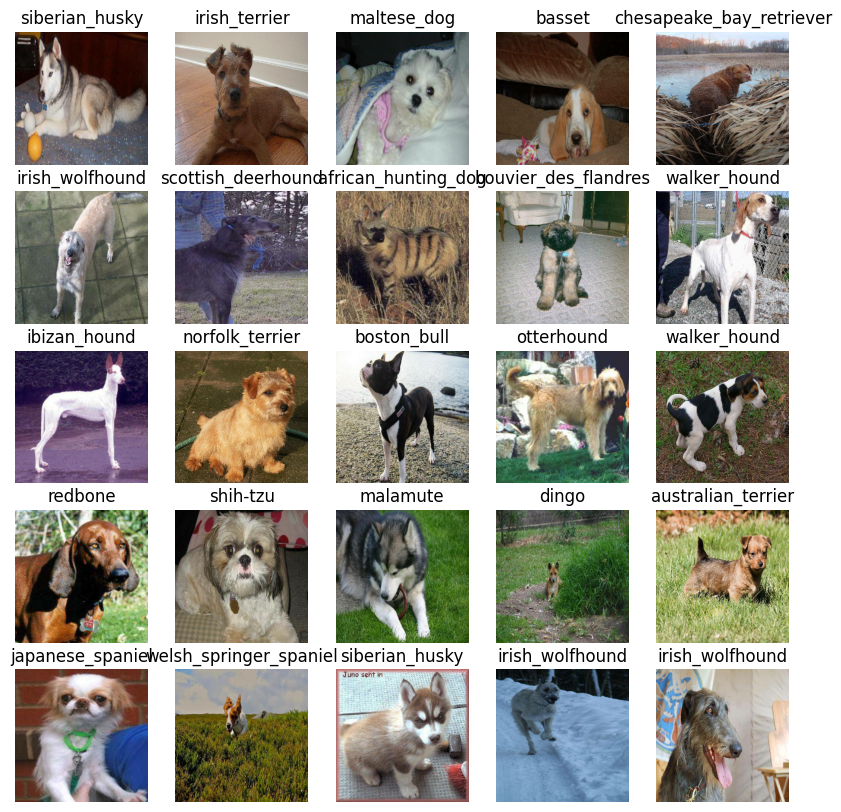

In [26]:
# Now let's visualize the data in a training batch
show25Images(trainImages, trainLabels)

In [27]:
# Now let's visualize our validation set
valImages, valLabels = next(valData.as_numpy_iterator())
# show25Images(valImages, valLabels)
len(valImages), len(valLabels)

(32, 32)

## Building a Model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use. (Define the model you need to use)

In [28]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch (32), height, width, color channels

# Setup the output shape of our model
OUTPUT_SHAPE = len(uniqueBreeds) # We will have 1 on the correct label for example

# Setup model URL from TensorFlow Hub (Redirected to Kaggle)
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion. (Do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Return the model.

In [29]:
import tf_keras

def createModel(inputShape=INPUT_SHAPE, outputShape=OUTPUT_SHAPE, modelUrl=MODEL_URL):
  print("Building model with:", modelUrl)

  # Setup the model layers
  model = tf_keras.Sequential([
    hub.KerasLayer(modelUrl), # Layer 1 (input layer)
    tf_keras.layers.Dense(units=outputShape, activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(),
      optimizer=tf_keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape=inputShape)  # Batch input shape.

  return model


In [30]:
model = createModel()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard (dashboard to see info about the model) which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory (logs that mention how much our model is doing good), and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [32]:
# Load TensorBoard Notebook Extension
%load_ext tensorboard

In [33]:
import datetime

# Create a function to build a TensorBoard callback
def createTensorBoardCallback():
  # Create a log directory for storing TensorBoard logs
  logDir = os.path.join("drive/MyDrive/Dog Vision/logs", datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logDir)

### Create a Function to Build an Early Stopping Callback.

This will help us prevent overfitting by stopping the model from training when certain evaluation metric stops improving.

If a model trains for too long, it can do really well at finding patterns where we will not be able to use these patterns on another dataset (doesn't generalize well).

In [34]:
# Create early stopping callback
earlyStopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [35]:
NUM_EPOCHS = 100 #@param {type: "slider", min:10, max:100, step:10}

In [36]:
# Check to make sure we're still running on a GPU
print("GPU", "Available!" if tf.config.list_physical_devices("GPU") else "Not Available!")

GPU Available!


Let's create a function which trains a model.

* Create a model using `createModel()`
* Setup a TensorBoard callback using `createTensorBoardCallback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model

In [37]:
# Build a function to train and return a trained model
def trainModel():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = createModel()

  # Create new TensorBoard session everytime we train a model
  tensorboard = createTensorBoardCallback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=trainData, epochs=NUM_EPOCHS, validation_data=valData, validation_freq=1, callbacks=[tensorboard, earlyStopping])

  # Return the fitted model
  return model

In [ ]:
# Fit the model into the data
model = trainModel()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Epoch 1/100
 5/25 [=====>........................] - ETA: 3:51 - loss: 5.4426 - accuracy: 0.0063

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevnet model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing! It means our model is learning!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

# Making and evaluating predicitions using a trained model


In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(valData, verbose=1)
predictions

In [ ]:
predictions.shape

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn probas into their respective label (easier to understand)
def getPredLabel(predictionProbas):
  """
  Turns an array of prediction probabilities into a label.
  """
  return uniqueBreeds[np.argmax(predictionProbas)]

# Get a predicted label based on an array of prediction probas
predLabel = getPredLabel(predictions[0])
predLabel

Now since our validation data is still in a batch dataset, we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
valData

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batch dataset of (image, label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(uniqueBreeds[np.argmax(label)])

  return images, labels


valImages, valLabels = unbatchify(valData)


Now we've got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make a function to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probas to a predicted label.
* Plot the predicted label, its predcited probability, the truth label and the target image on a single plot.

In [ ]:
def plotPred(predictionProbas, labels, images, n=2):
  """
  View the prediction, ground truth and image for sample n
  """
  predProb, trueLabel, image = predictionProbas[n], labels[n], images[n]

  # Get the prediction label
  predLabel = getPredLabel(predProb)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if trueLabel == predLabel:
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted, proba of prediction and truth label
  plt.title("Predicted Label: {} | Probability: {:2.0f}% | Truth Label: {}".format(predLabel, np.max(predProb)*100, trueLabel), color=color)

In [ ]:
plotPred(predictionProbas=predictions, labels=valLabels, images=valImages)

Now we've got one function to visualize our model prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using `getPredLabel()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot top 10 prediction probablity values and labels, coloring the true label green.

In [ ]:
def plotPredConf(predictionProbas, labels, n=1):
  """
  Plot the top 10 highest confidences along with the truth label for sample n.
  """
  predProb, trueLabel = predictionProbas[n], labels[n]

  # Get the predicted label
  predLabel = getPredLabel(predProb)

  # Find the top 10 prediction confidence indexes
  top10PredIndexes = predProb.argsort()[-10:][::-1]

  # Find the top 10 values
  top10Confidences = predProb[top10PredIndexes]

  # Find the top 10 labels
  top10Labels = uniqueBreeds[top10PredIndexes]

  # Setup plot
  topPlot = plt.bar(np.arange(len(top10Labels)), top10Confidences, color="grey")
  plt.xticks(np.arange(len(top10Labels)), labels=top10Labels, rotation="vertical")

  # Change the color of the true label
  if np.isin(trueLabel, top10Labels):
    topPlot[np.argmax(top10Labels == trueLabel)].set_color("green")
  else:
    pass

In [ ]:
plotPredConf(predictionProbas=predictions, labels=valLabels, n=9)

Now we've got our some functions to help us visualize our predictions and evaluate our model, let's check out a few.

In [ ]:
# Let's check out a few predictions and their different values

iMultiplier = 0
numRows = 3
numCols = 2
numImages = numRows * numCols
plt.figure(figsize=(10 * numCols, 5 * numRows))

for i in range(numImages):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plotPred(predictionProbas=predictions, labels=valLabels, images=valImages, n=i+iMultiplier)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plotPredConf(predictionProbas=predictions, labels=valLabels, n=i+iMultiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and Reloading a Trained Model

In [ ]:
# Create a function to save a model
def saveModel(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modelDir = os.path.join("drive/MyDrive/Dog Vision/models", datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))
  modelPath = modelDir + "-" + suffix + ".h5" # h5 is the save format of a model
  print(f"Saving Model to: {modelPath}...")
  model.save(modelPath)
  return modelPath


In [ ]:
# Create a function to load a trained model
def loadModel(modelPath):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {modelPath}...")
  model = tf_keras.models.load_model(modelPath, custom_objects={"KerasLayer": hub.KerasLayer})
  return model

Now we've got fuctions to save and load a trained model, let's make sure they are working.

In [ ]:
# Save our model trained on 1000 images
savedModelPath = saveModel(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# Load a trained model
loaded1000ImagesModel = loadModel(savedModelPath)

In [ ]:
# Evaluate the pre-saved model (Before Saving it, just for testing)
model.evaluate(valData)

In [ ]:
# Evaluate the post-saved model (After Saving it, just for testing)
loaded1000ImagesModel.evaluate(valData)

## Training a big dog model (on the full data)

In [ ]:
# Create a data batch with the full data set
fullData = createDataBatches(X, y)

In [ ]:
fullData

In [ ]:
# Create a model for full model
fullModel = createModel()

In [ ]:
# Create full model callbacks
fullModelTensorboard = createTensorBoardCallback()

# No validation set when on all the data, so we can't monitor validation accuracy
fullModelEarlyStopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model to the full data
fullModel.fit(x=fullData, epochs=NUM_EPOCHS, callbacks = [fullModelTensorboard, fullModelEarlyStopping])

In [ ]:
fullModelPath = saveModel(fullModel, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
# Load the full model
loadedFullModel = loadModel(fullModelPath)

## Making predictions on the test data set

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

This what we are going to do:
* Get the test image filenames.
* Convert the filenames into test data batches using `createDataBatches()` and setting the `testData` parameter to `True` since the testData doesn't have labels.
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
testPath = "drive/MyDrive/Dog Vision/test/"
testFileNames = [testPath + fname for fname in os.listdir(testPath)]

In [ ]:
# Create test data batch
testData = createDataBatches(testFileNames, testData=True)

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an hour).

In [ ]:
# Make predictions on test data batch using the loaded full model
testPredictions = loadedFullModel.predict(testData, verbose=1)

## Preparing test dataset predictions for Kaggle.

We need a CSV file that contains the id of the file (image) in a column and column for each dog breed.

To get the data in this format, we'll:
* Create a Pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create a Pandas DataFrame with empty columns
predsDf = pd.DataFrame(columns=["id"] + list(uniqueBreeds))
predsDf.head()

In [ ]:
# Extract image file ID from the filepaths that were already taken.
testIds = [os.pathh.splitext(path)[0] for path in os.listdir(testPath)]
predsDf["id"] = testIds

In [ ]:
# Add the prediction probabilities to each dog breed column
predsDf[list(uniqueBreeds)] = testPredictions
predsDf.head()

In [ ]:
# Save our predictions data frame to CSV for submission to Kaggle
predsDf.to_csv("drive/MyDrive/Dog Vision/full-model-predictions-submission-1-mobilenetv2.csv", index=False)